#### Dataset Reference
- Link Dataset: https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings
- Metacritic Link: https://www.metacritic.com/browse/games/release-date/available

## A. Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px

In [2]:
# Check Directory
os.listdir()

['.ipynb_checkpoints',
 'archive.zip',
 'Video Sales Analysis Project.ipynb',
 'Video_Games_Sales_as_at_22_Dec_2016.csv']

## B. Import Dataset

In [3]:
Video_Games_Sales_df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
Video_Games_Sales_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Check number of columns and rows
Video_Games_Sales_df.shape

(16719, 16)

In [5]:
print('Number of Columns:',len(Video_Games_Sales_df.columns))
print('Columns Names in Dataset are: \n',list(Video_Games_Sales_df.columns))

Number of Columns: 16
Columns Names in Dataset are: 
 ['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating']


In [6]:
# Checking Datatype
Video_Games_Sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [7]:
# Checking Missing Values
Video_Games_Sales_df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [8]:
# Percent of Missing Values
Video_Games_Sales_df.isna().sum()*100/len(Video_Games_Sales_df)

Name                0.011962
Platform            0.000000
Year_of_Release     1.608948
Genre               0.011962
Publisher           0.322986
NA_Sales            0.000000
EU_Sales            0.000000
JP_Sales            0.000000
Other_Sales         0.000000
Global_Sales        0.000000
Critic_Score       51.330821
Critic_Count       51.330821
User_Score         40.098092
User_Count         54.602548
Developer          39.613613
Rating             40.486871
dtype: float64

In [9]:
missing_df = Video_Games_Sales_df[Video_Games_Sales_df.isna().any(axis=1)]
missing_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,Nintendo,9.05,10.95,1.93,2.74,24.67,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
Video_Games_Sales_df[Video_Games_Sales_df.Publisher != Video_Games_Sales_df.Developer]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,Nintendo,9.05,10.95,1.93,2.74,24.67,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
Video_Games_Sales_df[Video_Games_Sales_df.Developer=='Rockstar North']

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,97.0,50.0,8.2,3994.0,Rockstar North,M
17,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81,95.0,80.0,9,1588.0,Rockstar North,M
23,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.66,5.14,0.06,1.41,16.27,97.0,58.0,8.1,3711.0,Rockstar North,M
24,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15,95.0,62.0,8.7,730.0,Rockstar North,M
42,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.96,6.31,0.38,1.97,12.61,97.0,66.0,8.3,2899.0,Rockstar North,M
51,Grand Theft Auto IV,X360,2008.0,Action,Take-Two Interactive,6.76,3.07,0.14,1.03,11.01,98.0,86.0,7.9,2951.0,Rockstar North,M
57,Grand Theft Auto IV,PS3,2008.0,Action,Take-Two Interactive,4.76,3.69,0.44,1.61,10.50,98.0,64.0,7.5,2833.0,Rockstar North,M
165,Grand Theft Auto V,XOne,2014.0,Action,Take-Two Interactive,2.81,2.19,0.00,0.47,5.48,97.0,14.0,7.9,764.0,Rockstar North,M
875,Grand Theft Auto: San Andreas,XB,2005.0,Action,Take-Two Interactive,1.26,0.61,0.00,0.09,1.95,93.0,58.0,8.6,118.0,Rockstar North,AO
1543,Manhunt,PS2,2003.0,Action,Take-Two Interactive,0.63,0.49,0.00,0.16,1.28,76.0,47.0,8.3,136.0,Rockstar North,M


In [12]:
Video_Games_Sales_df[Video_Games_Sales_df.Publisher != Video_Games_Sales_df.Developer]['Developer'].value_counts().sum()

8861

In [13]:
missing_df[missing_df.Rating.isna()]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,Nintendo,9.05,10.95,1.93,2.74,24.67,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
missing_df[missing_df.Year_of_Release.isna()]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
183,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23,94.0,29.0,8.5,140.0,EA Tiburon,E
377,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49,84.0,20.0,6.4,76.0,EA Canada,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.80,0.97,0.00,0.29,3.06,74.0,17.0,7.9,22.0,Traveller's Tales,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00,NaN,NaN,NaN,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16376,PDC World Championship Darts 2008,PSP,NaN,Sports,Oxygen Interactive,0.01,0.00,0.00,0.00,0.01,43.0,7.0,tbd,NaN,Oxygen Interactive,E10+
16409,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.00,0.00,0.01,69.0,14.0,6.5,6.0,Midway,T
16452,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01,59.0,6.0,6.7,107.0,Saber Interactive,M
16462,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
missing_df[missing_df.Publisher.isna()]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00,NaN,NaN,NaN,NaN,NaN,NaN
1301,Triple Play 99,PS,NaN,Sports,NaN,0.81,0.55,0.00,0.10,1.46,NaN,NaN,NaN,NaN,NaN,NaN
1667,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007.0,Misc,NaN,0.87,0.32,0.00,0.02,1.21,NaN,NaN,NaN,NaN,NaN,NaN
2212,Bentley's Hackpack,GBA,2005.0,Misc,NaN,0.67,0.25,0.00,0.02,0.93,NaN,NaN,NaN,NaN,NaN,NaN
3148,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.46,0.17,0.00,0.01,0.64,NaN,NaN,NaN,NaN,NaN,NaN
3159,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.46,0.17,0.00,0.01,0.64,NaN,NaN,NaN,NaN,NaN,NaN
3755,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.38,0.14,0.00,0.01,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4127,Sonic the Hedgehog,PS3,NaN,Platform,NaN,0.00,0.48,0.00,0.00,0.48,43.0,17.0,4.1,176.0,Sonic Team,E10+
4508,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN,0.31,0.11,0.00,0.01,0.43,NaN,NaN,NaN,NaN,NaN,NaN
4615,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN,0.30,0.11,0.00,0.01,0.42,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
Video_Games_Sales_df[Video_Games_Sales_df.duplicated(subset=['Name','Year_of_Release','Publisher'])].sort_values('Name').head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
3862,Frozen: Olaf's Quest,DS,2013.0,Platform,Disney Interactive Studios,0.21,0.26,0.00,0.04,0.52,NaN,NaN,NaN,NaN,NaN,NaN
14660,007: Quantum of Solace,PC,2008.0,Action,Activision,0.01,0.01,0.00,0.00,0.03,70.0,18.0,6.3,55.0,Treyarch,T
1785,007: Quantum of Solace,PS3,2008.0,Action,Activision,0.43,0.51,0.02,0.19,1.14,65.0,42.0,6.6,47.0,Treyarch,T
3120,007: Quantum of Solace,Wii,2008.0,Action,Activision,0.29,0.28,0.01,0.07,0.65,54.0,11.0,7.5,26.0,Treyarch,T
9508,007: Quantum of Solace,DS,2008.0,Action,Activision,0.11,0.01,0.00,0.01,0.13,65.0,10.0,tbd,NaN,Vicarious Visions,T
4475,007: Quantum of Solace,PS2,2008.0,Action,Activision,0.17,0.00,0.00,0.26,0.43,NaN,NaN,NaN,NaN,NaN,NaN
2243,007: The World is not Enough,PS,2000.0,Action,Electronic Arts,0.51,0.35,0.00,0.06,0.92,61.0,11.0,6.7,44.0,Black Ops Entertainment,T
12284,187: Ride or Die,XB,2005.0,Racing,Ubisoft,0.05,0.01,0.00,0.00,0.06,51.0,40.0,6.9,8.0,Ubisoft Paris,M
7821,2002 FIFA World Cup,XB,2002.0,Sports,Electronic Arts,0.14,0.04,0.00,0.01,0.19,79.0,17.0,9,4.0,Software Creations,E
13303,2002 FIFA World Cup,GC,2002.0,Sports,Electronic Arts,0.04,0.01,0.00,0.00,0.05,78.0,9.0,7.7,6.0,EA Sports,E


### NOTE:

- ~~Delete rows with no Video Game Names~~
- ~~Convert Year_of_Release column to Int data~~
- ~~Convert User_Score to Float data~~
- ~~Fill Developer Missing Values with corresponding Publisher Data~~
- ~~Fix Global Sale Data~~
- ~~Get Year Released in the Video Games Names for Year_of_Release Missing Values, delete records that do not have years~~
- ~~Fill Publisher Missing Values with most common Publisher Value~~
- ~~Delete Records with no Genre Values~~
- ~~Fill Missing Values of Critic_Score, Critic_Count, User_Score, User_Count with Average Scores of others records that has same Video Names, same Developer and Same Year_of_Release~~

## C. Data Cleaning

### 1. Delete rows with no Video Game Names and with no Genre Values

In [17]:
# Delete rows with no Video Game Names and with no Genre Values
Video_Games_Sales_df = Video_Games_Sales_df.dropna(axis=0,how='any',subset=['Name','Genre'])
Video_Games_Sales_df[['Name','Genre']].isna().sum()

Name     0
Genre    0
dtype: int64

### 2. Fix Global Sale Data

In [18]:
# Fix Global Sale Data
Video_Games_Sales_df.Global_Sales = Video_Games_Sales_df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1)
Video_Games_Sales_df.tail(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16709,15 Days,PC,2009.0,Adventure,DTP Entertainment,0.00,0.01,0.00,0.0,0.01,63.0,6.0,5.8,8.0,DTP Entertainment,NaN
16710,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.0,0.01,NaN,NaN,tbd,NaN,Atari,T
16711,Aiyoku no Eustia,PSV,2014.0,Misc,dramatic create,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16712,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16713,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16718,Winning Post 8 2016,PSV,2016.0,Simulation,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN


### 3. Get Year Released in the Video Games Names for Year_of_Release Missing Values, delete records that do not have years

##### 3.1. Fill with Years in Video Games Name 

In [19]:
def get_year_release(game_name):
    num = str(game_name).split(' ')[-1]
    if (num.isdigit()) & (len(num) == 4):
        return int(num)

In [20]:
Video_Games_Sales_df.Year_of_Release.fillna(Video_Games_Sales_df.Name.apply(get_year_release),inplace=True)

In [21]:
Video_Games_Sales_df.Year_of_Release.isna().sum()

254

In [22]:
Video_Games_Sales_df.shape

(16717, 16)

##### 3.2. Fill with Years of Same Games

In [23]:
# Create a Data of No missing Year Video Game
unique_no_year_missing_df = Video_Games_Sales_df.dropna(axis=0,subset=['Year_of_Release'])[['Name','Year_of_Release']].drop_duplicates()
unique_no_year_missing_df.head()

,Name,Year_of_Release
0,Wii Sports,2006.0
1,Super Mario Bros.,1985.0
2,Mario Kart Wii,2008.0
3,Wii Sports Resort,2009.0
4,Pokemon Red/Pokemon Blue,1996.0


In [24]:
# Create a Data of Missing Year Video Game
year_missing = Video_Games_Sales_df[Video_Games_Sales_df.Year_of_Release.isna()][['Name','Year_of_Release']]
year_missing.head()

,Name,Year_of_Release
456,LEGO Batman: The Videogame,NaN
609,Space Invaders,NaN
627,Rock Band,NaN
657,Frogger's Adventures: Temple of the Frog,NaN
678,LEGO Indiana Jones: The Original Adventures,NaN


In [25]:
# Create No Missing Dict
no_missing_name = list(unique_no_year_missing_df.Name)
no_missing_year = list(unique_no_year_missing_df.Year_of_Release)
no_missing_all = zip(no_missing_name,no_missing_year)
no_missing_dict = dict(no_missing_all)

# Create Video Game Names with Missing Year
Name = list(year_missing.Name)

# Find the Year in No Missing Dict
year = []
for name in Name:
    if name in no_missing_dict.keys():
        year.append(no_missing_dict[name])
    else:
        year.append(None)
        
# Fill the missing value
year_missing.Year_of_Release=year
Video_Games_Sales_df.Year_of_Release.fillna(year_missing.Year_of_Release,inplace=True)

In [26]:
Video_Games_Sales_df.Year_of_Release.isna().sum()

139

In [27]:
Video_Games_Sales_df.shape

(16717, 16)

##### 3.3. Drop Rows with Missing Years

In [28]:
Video_Games_Sales_df=Video_Games_Sales_df.dropna(subset=['Year_of_Release'])

In [29]:
Video_Games_Sales_df.Year_of_Release.isna().sum()

0

### 4. Fix Missing Publisher

##### 4.1. Find the Missing Publisher

In [30]:
missing_publisher = Video_Games_Sales_df[Video_Games_Sales_df.Publisher.isna()]
missing_publisher.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
475,wwe Smackdown vs. Raw 2006,PS2,2006.0,Fighting,NaN,1.57,1.02,0.0,0.41,3.00,NaN,NaN,NaN,NaN,NaN,NaN
1667,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007.0,Misc,NaN,0.87,0.32,0.0,0.02,1.21,NaN,NaN,NaN,NaN,NaN,NaN
2212,Bentley's Hackpack,GBA,2005.0,Misc,NaN,0.67,0.25,0.0,0.02,0.94,NaN,NaN,NaN,NaN,NaN,NaN
3148,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.46,0.17,0.0,0.01,0.64,NaN,NaN,NaN,NaN,NaN,NaN
3159,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.46,0.17,0.0,0.01,0.64,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
no_missing_publisher = Video_Games_Sales_df[~(Video_Games_Sales_df.Publisher.isna())]
no_missing_publisher.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# Create Dictionary for No Missing Publisher
no_missing_publisher_name = no_missing_publisher.Name
publisher = no_missing_publisher.Publisher
no_missing_publisher_dict = dict(zip(no_missing_publisher_name,publisher))

# Find the Missing the Year
missing_year = []
for name in missing_publisher.Name:
    if name in no_missing_publisher_dict.keys():
        missing_year.append(no_missing_publisher_dict[name])
    else:
        missing_year.append(None)

# Fill the missing year        
missing_publisher.Publisher = missing_year
Video_Games_Sales_df.Publisher.fillna(missing_publisher.Publisher,inplace=True)

D:\6.Program\Anaconda\Anaconda\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [33]:
Video_Games_Sales_df.Publisher.isna().sum()

33

##### 4.2. Drop the Record with Missing Publisher

In [34]:
Video_Games_Sales_df.dropna(subset=['Publisher'],inplace=True)

In [35]:
Video_Games_Sales_df.shape

(16545, 16)

In [36]:
Video_Games_Sales_df.isna().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8467
Critic_Count       8467
User_Score         6609
User_Count         9004
Developer          6534
Rating             6675
dtype: int64

### 5. Fill Developer Missing Values with corresponding Publisher Data

In [37]:
# Fill Developer Missing Values with corresponding Publisher Data
developer_missing_df = missing_df[missing_df.Developer.isna()]
developer_missing_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,Nintendo,9.05,10.95,1.93,2.74,24.67,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
Video_Games_Sales_df.Developer.fillna(developer_missing_df.Publisher,inplace=True)

In [39]:
Video_Games_Sales_df.Developer.isna().sum()

3

In [40]:
Video_Games_Sales_df = Video_Games_Sales_df.dropna(subset=['Developer'])

### 6. Convert User_Score to Numeric

##### 6.1. Fix 'tbd' Data

In [41]:
def fix_tdb(text):
    if text == 'tbd':
        return None
    else: 
        return text

In [42]:
Video_Games_Sales_df.User_Score = Video_Games_Sales_df.User_Score.apply(fix_tdb,)

##### 6.2. Convert to Numeric

In [43]:
Video_Games_Sales_df.User_Score = pd.to_numeric(Video_Games_Sales_df.User_Score)

In [44]:
Video_Games_Sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16542 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16542 non-null  object 
 1   Platform         16542 non-null  object 
 2   Year_of_Release  16542 non-null  float64
 3   Genre            16542 non-null  object 
 4   Publisher        16542 non-null  object 
 5   NA_Sales         16542 non-null  float64
 6   EU_Sales         16542 non-null  float64
 7   JP_Sales         16542 non-null  float64
 8   Other_Sales      16542 non-null  float64
 9   Global_Sales     16542 non-null  float64
 10  Critic_Score     8078 non-null   float64
 11  Critic_Count     8078 non-null   float64
 12  User_Score       7541 non-null   float64
 13  User_Count       7541 non-null   float64
 14  Developer        16542 non-null  object 
 15  Rating           9870 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.1+ MB


### 7. Fill Missing Values of Critic_Score, Critic_Count, User_Score, User_Count with Average Scores of others records that has same Video Names, same Developer and Same Year_of_Release

##### 7.1. Fill with Mean Rating of the Same Game

In [45]:
# 1. Create a Mean Rating for no missing rating game
no_missing_rating_df = Video_Games_Sales_df[Video_Games_Sales_df[['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']].notna().all(axis=1)]
mean_rating_df = no_missing_rating_df.groupby('Name')[['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']].mean().reset_index()

# 2. Create a Dictionary from the mean rating df
mean_rating_name = mean_rating_df.Name
mean_rating_score_zip = zip(mean_rating_df.Critic_Score,mean_rating_df.Critic_Count,mean_rating_df.User_Score,mean_rating_df.User_Count)
mean_dict = dict(zip(mean_rating_name,mean_rating_score_zip))
mean_dict

{' Tales of Xillia 2': (71.0, 59.0, 7.9, 216.0),
 '.hack//Infection Part 1': (75.0, 35.0, 8.5, 60.0),
 '.hack//Mutation Part 2': (76.0, 24.0, 8.9, 81.0),
 '.hack//Outbreak Part 3': (70.0, 23.0, 8.7, 19.0),
 '007 Racing': (51.0, 16.0, 4.6, 14.0),
 '007: Quantum of Solace': (63.5, 35.0, 6.875, 49.75),
 '007: The World is not Enough': (61.0, 11.0, 6.7, 44.0),
 '1 vs. 100': (38.0, 5.0, 3.2, 5.0),
 '100 Classic Books': (70.0, 7.0, 6.0, 12.0),
 '15 Days': (63.0, 6.0, 5.8, 8.0),
 '1701 A.D.': (79.0, 30.0, 8.3, 38.0),
 '18 Wheeler: American Pro Trucker': (56.5, 14.0, 6.25, 13.0),
 '187: Ride or Die': (51.5, 36.5, 6.85, 10.0),
 '2002 FIFA World Cup': (76.66666666666667,
  15.0,
  7.433333333333334,
  9.333333333333334),
 '2010 FIFA World Cup South Africa': (76.0, 36.75, 7.499999999999999, 33.75),
 '2014 FIFA World Cup Brazil': (73.5, 31.0, 4.35, 90.0),
 '24: The Game': (62.0, 53.0, 8.2, 40.0),
 '25 to Life': (40.0, 21.5, 6.050000000000001, 29.5),
 '300: March to Glory': (55.0, 31.0, 7.1, 14.0),

In [46]:
# 3. Create df for missing rating of each column
missing_critic_score_df = Video_Games_Sales_df[Video_Games_Sales_df.Critic_Score.isna()]
missing_critic_count_df = Video_Games_Sales_df[Video_Games_Sales_df.Critic_Count.isna()]
missing_user_count_df = Video_Games_Sales_df[Video_Games_Sales_df.User_Count.isna()]
missing_user_score_df = Video_Games_Sales_df[Video_Games_Sales_df.User_Score.isna()]

In [47]:
# 4. Definition of two fix and fill function
def fix_missing_values(series, dictionary,num=int):
    lst = []
    for i in series:
        if i in dictionary.keys():
            lst.append(dictionary[i][num])
        else:
            lst.append(None)
    return lst

def fill_missing_values(column_name,missingdf,df,dictionary,num=int):
    missing = fix_missing_values(missingdf.Name,dictionary,num=num)
    missingdf[column_name] = missing
    df[column_name].fillna(missingdf[column_name],inplace=True)

In [48]:
# 5. Fill the missing values
fill_missing_values('Critic_Score',missing_critic_score_df,Video_Games_Sales_df,mean_dict,0)
fill_missing_values('Critic_Count',missing_critic_count_df,Video_Games_Sales_df,mean_dict,1)
fill_missing_values('User_Score',missing_user_score_df,Video_Games_Sales_df,mean_dict,2)
fill_missing_values('User_Count',missing_user_count_df,Video_Games_Sales_df,mean_dict,3)

<ipython-input-47-cbd58d0d8887>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missingdf[column_name] = missing


##### 7.2. Fill with Median Rating of the Same Game Genre

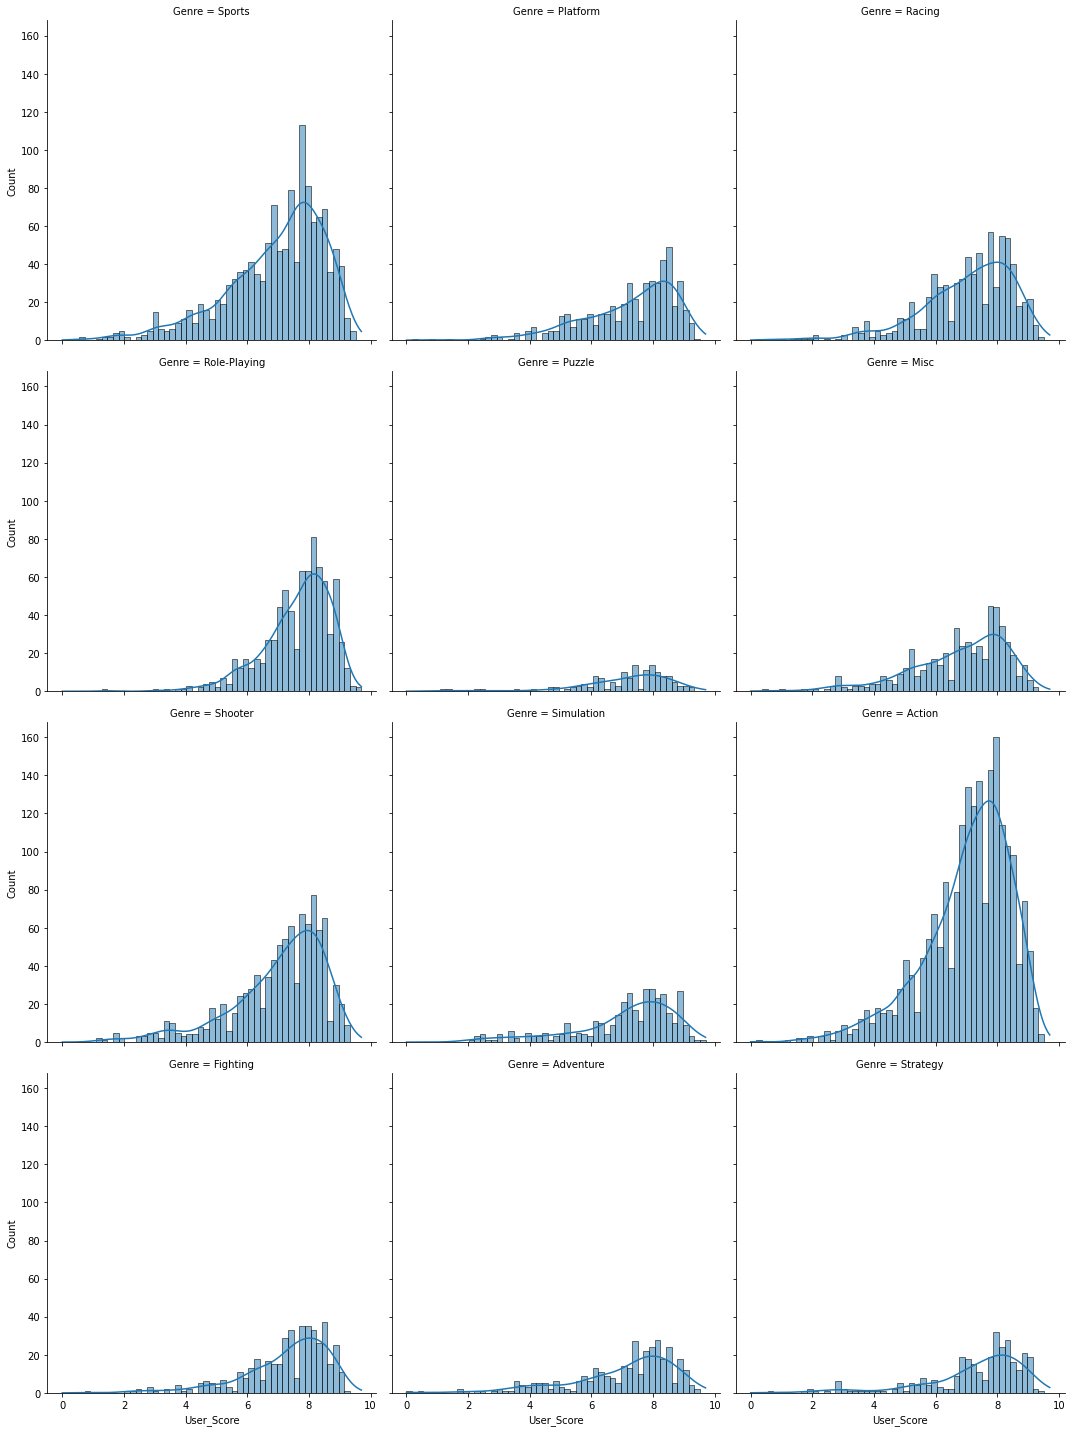

In [49]:
sns.displot(data=Video_Games_Sales_df,x='User_Score',col='Genre',col_wrap=3,kde=True);

In [50]:
no_missing_rating2_df = Video_Games_Sales_df.dropna(subset = ['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count'])
no_missing_median_df = no_missing_rating2_df.groupby('Genre')[['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']].median().reset_index()
no_missing_median_df

,Genre,Critic_Score,Critic_Count,User_Score,User_Count
0,Action,69.0,23.333333,7.30,26.0
1,Adventure,66.0,17.000000,7.55,17.0
2,Fighting,73.0,26.000000,7.60,27.0
3,Misc,70.0,17.000000,7.10,12.0
4,Platform,70.0,18.000000,7.70,17.0
5,Puzzle,74.0,21.000000,7.50,11.0
6,Racing,70.0,19.000000,7.30,16.0
7,Role-Playing,74.0,30.000000,7.80,55.0
8,Shooter,73.0,33.000000,7.40,59.0
9,Simulation,71.0,19.000000,7.60,20.0


In [51]:
rating_mean = zip(no_missing_median_df.Critic_Score,no_missing_median_df.Critic_Count,no_missing_median_df.User_Score,no_missing_median_df.User_Count)
genre = no_missing_median_df.Genre
median_dict = dict(zip(genre,rating_mean))
median_dict

{'Action': (69.0, 23.333333333333332, 7.3, 26.0),
 'Adventure': (66.0, 17.0, 7.55, 17.0),
 'Fighting': (73.0, 26.0, 7.6, 27.0),
 'Misc': (70.0, 17.0, 7.1, 12.0),
 'Platform': (70.0, 18.0, 7.7, 17.0),
 'Puzzle': (74.0, 21.0, 7.5, 11.0),
 'Racing': (70.0, 19.0, 7.3, 16.0),
 'Role-Playing': (74.0, 30.0, 7.8, 55.0),
 'Shooter': (73.0, 33.0, 7.4, 59.0),
 'Simulation': (71.0, 19.0, 7.6, 20.0),
 'Sports': (76.0, 19.25, 7.4, 16.0),
 'Strategy': (74.0, 25.0, 7.7, 38.0)}

In [52]:
missing_rating2_df = Video_Games_Sales_df[Video_Games_Sales_df[['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']].isna().any(axis=1)]

In [53]:
Critic_Score = fix_missing_values(missing_rating2_df.Genre,median_dict,0)
Critic_Count = fix_missing_values(missing_rating2_df.Genre,median_dict,1)
User_Score = fix_missing_values(missing_rating2_df.Genre,median_dict,2)
User_Count = fix_missing_values(missing_rating2_df.Genre,median_dict,3)

In [54]:
missing_rating2_df.Critic_Score = Critic_Score
Video_Games_Sales_df.Critic_Score.fillna(missing_rating2_df.Critic_Score,inplace=True)

missing_rating2_df.Critic_Count = Critic_Count
Video_Games_Sales_df.Critic_Count.fillna(missing_rating2_df.Critic_Count,inplace=True)

missing_rating2_df.User_Score = User_Score
Video_Games_Sales_df.User_Score.fillna(missing_rating2_df.User_Score,inplace=True)

missing_rating2_df.User_Count = User_Count
Video_Games_Sales_df.User_Count.fillna(missing_rating2_df.User_Count,inplace=True)

D:\6.Program\Anaconda\Anaconda\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


### 8. Drop Rating Column

In [55]:
Video_Games_Sales_df.drop('Rating',axis=1,inplace=True)

### 9. Convert Critic_Count and User_Count to integer

In [56]:
Video_Games_Sales_df.Critic_Count = np.round(Video_Games_Sales_df.Critic_Count).astype('int')
Video_Games_Sales_df.User_Count = np.round(Video_Games_Sales_df.User_Count).astype('int')
Video_Games_Sales_df.Year_of_Release = Video_Games_Sales_df.Year_of_Release.astype('int')

In [57]:
Video_Games_Sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16542 entries, 0 to 16718
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16542 non-null  object 
 1   Platform         16542 non-null  object 
 2   Year_of_Release  16542 non-null  int32  
 3   Genre            16542 non-null  object 
 4   Publisher        16542 non-null  object 
 5   NA_Sales         16542 non-null  float64
 6   EU_Sales         16542 non-null  float64
 7   JP_Sales         16542 non-null  float64
 8   Other_Sales      16542 non-null  float64
 9   Global_Sales     16542 non-null  float64
 10  Critic_Score     16542 non-null  float64
 11  Critic_Count     16542 non-null  int32  
 12  User_Score       16542 non-null  float64
 13  User_Count       16542 non-null  int32  
 14  Developer        16542 non-null  object 
dtypes: float64(7), int32(3), object(5)
memory usage: 1.8+ MB


In [58]:
Video_Games_Sales_df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51,8.00,322,Nintendo
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,70.0,18,7.70,17,Nintendo
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73,8.30,709,Nintendo
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73,8.00,192,Nintendo
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38,74.0,30,7.80,55,Nintendo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,69.0,23,7.30,26,Tecmo Koei
16715,LMA Manager 2007,X360,2006,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,76.0,19,7.40,16,Codemasters
16716,Haitaka no Psychedelica,PSV,2016,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,66.0,17,7.55,17,Idea Factory
16717,Spirits & Spells,GBA,2003,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,70.0,18,7.70,17,Wanadoo
